# First steps

The goal is to create an algorithm to identify metastatic cancer in small image patches taken from larger digital pathology scans. This data is from kaggle https://www.kaggle.com/c/histopathologic-cancer-detection.

In this dataset, you are provided with a large number of small pathology images to classify. Files are named with an image id. The train_labels.csv file provides the ground truth for the images in the train folder. You are predicting the labels for the images in the test folder. A positive label indicates that the center 32x32px region of a patch contains at least one pixel of tumor tissue. Tumor tissue in the outer region of the patch does not influence the label.



First, we import the packages.

In [3]:
import pandas as pd
import numpy as np
from PIL import Image    
import cv2
import torch
import matplotlib.pyplot as plt 
import matplotlib.patches as patches


We read the data and obtain the size and number of test and train data. Also, we visualize some examples.

Number of train files 220024
Number of test files 57457


Text(0, 0.5, 'Con tumor')

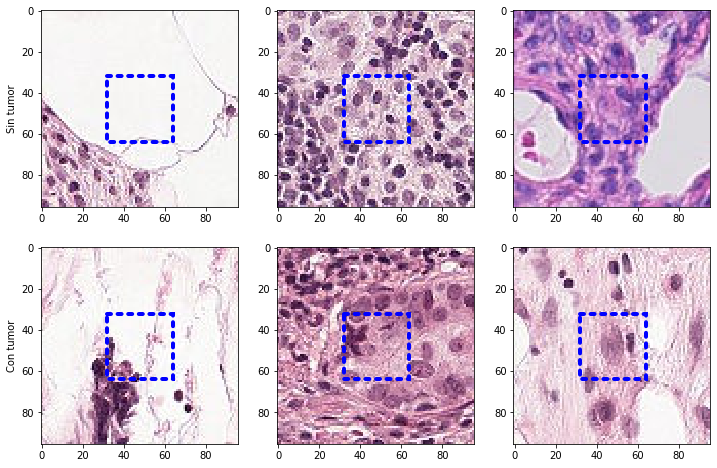

In [10]:
data = pd.read_csv("train_labels.csv")
test = pd.read_csv("sample_submission.csv")
print("Number of train files",data.shape[0]-1) 
print("Number of test files",test.shape[0]-1)

fig, ax= plt.subplots(2, 3, figsize=(12,8)) 
for i, idx in enumerate(data[data['label'] == 0]['id'][:3]):
    path = "train/" + idx+ ".tif"
    img = cv2.imread(path) 
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    ax[0,i].imshow(img)
    box = patches.Rectangle((32,32),32,32,linewidth=4,edgecolor='b',facecolor='none', linestyle=':', capstyle='round')
    ax[0, i].add_patch(box)
ax[0, 0].set_ylabel("Sin tumor")
for i, idx in enumerate(data[data['label'] == 1]['id'][:3]):
    path= "train/" + idx+ ".tif"
    img = cv2.imread(path) 
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    ax[1,i].imshow(img)
    box = patches.Rectangle((32,32),32,32,linewidth=4,edgecolor='b',facecolor='none', linestyle=':', capstyle='round')
    ax[1, i].add_patch(box)
ax[1, 0].set_ylabel("Con tumor")

We define the read function.

In [14]:
def readimage(n_batch, n, X):
    batch = []
    for i in range(n):
        path = "train/" + X.iloc[i+n*n_batch]['id']+ ".tif"
        img = cv2.imread(path) 
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        batch.append(np.moveaxis(img, -1,0))
        
    return torch.tensor(np.array(batch)).float()

We try to find outliers in the train dataset

In [ ]:
mean=[]
for i in range(4):
    X_train = readimage(i,55006, data)
    mean.append(X_train.mean(axis=1)) 
a = np.concatenate([np.asarray(mean[0]),np.asarray(mean[1])])
b = np.concatenate([np.asarray(mean[2]),np.asarray(mean[3])])
mean = np.concatenate([a, b])
plt.boxplot(mean)                   
Q3 = np.quantile(mean,0.75)
IQR = Q3-Q1
x = np.where((mean < Q1-1.5*IQR ) | (mean > Q3+1.5*IQR))

We visualize some examples.

(203,)


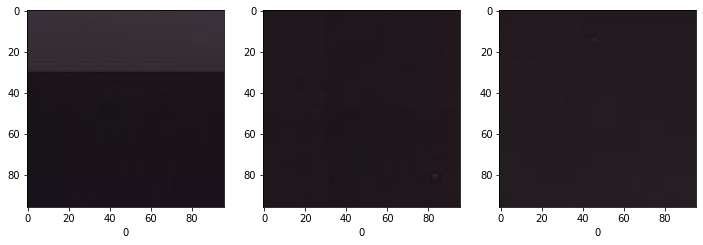

In [63]:
print(x.shape)

fig, ax= plt.subplots(1, 3, figsize=(12,8))   
for i, idx in enumerate(x[0:3]):
    path = "train/" + datos.iloc[idx][0] +".tif"
    img = cv2.imread(path) 
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    ax[i].imshow(img)
    ax[i].set_xlabel(datos.iloc[idx][1])




They are black images so we eliminate them.
We save the new dataset in newdata.csv

In [65]:
newdata= datos.drop(x)                
print(newdata.shape)
newdata.to_csv('newdata.csv')

(219822, 2)
